In [66]:
import pandas as pd
import numpy as np
from datetime import datetime

In [2]:
df = pd.read_csv('sales_data_1.csv')

In [3]:
df.head(5)

,Date,Firm bought from,Buying price,Customer,Selling price,Quantity sold
0,21/08/23,Vendor6,72.11,Customer7,91.58,44
1,21/08/23,Vendor4,75.08,Customer7,83.71,17
2,21/08/23,Vendor7,83.93,Customer2,103.76,15
3,21/08/23,Vendor7,52.01,Customer3,64.53,7
4,21/08/23,Vendor2,98.91,Customer5,140.92,1


### 1.Overall gross margin 

In [12]:
df['Total Revenue'] = df['Selling price'] * df['Quantity sold']
df['Total Cost'] = df['Buying price'] * df['Quantity sold']
df['Gross Margin'] = df['Total Revenue'] - df['Total Cost']
overall_gross_margin = df['Gross Margin'].sum()
print("Overall Gross Margin:", overall_gross_margin)

Overall Gross Margin: 31482.75


In [14]:
overall_total_revenue = df['Total Revenue'].sum()

In [15]:
overall_gross_margin_percentage = (overall_gross_margin / overall_total_revenue) * 100

In [18]:
print("Overall Gross Margin percentage:",overall_gross_margin_percentage)

Overall Gross Margin percentage: 24.633558915188384


### 2.Most profitable vendor 

In [20]:
# Initialize a dictionary to store the gross profit for each vendor
vendor_gross_profit = {}

In [27]:
# Calculate the gross profit for each vendor
for i in range(0,len(df),1):
    vendor = df["Firm bought from"][i]
    buying_price = df["Buying price"][i]
    selling_price = df["Selling price"][i]
    quantity = df["Quantity sold"][i]
    gross_profit = (selling_price - buying_price) * quantity

    # Update the gross profit for the vendor in the dictionary
    if vendor in vendor_gross_profit:
        vendor_gross_profit[vendor] += gross_profit
    else:
        vendor_gross_profit[vendor] = gross_profit


In [23]:
df["Firm bought from"][0]

'Vendor6'

In [26]:
len(df)

70

In [28]:
vendor_gross_profit

{'Vendor6': 1217.9499999999998,
 'Vendor4': 6903.309999999999,
 'Vendor7': 4961.05,
 'Vendor2': 1296.9799999999998,
 'Vendor9': 4266.699999999999,
 'Vendor3': 6370.670000000001,
 'Vendor1': 1555.5899999999997,
 'Vendor5': 1616.1400000000003,
 'Vendor10': 3040.6200000000003,
 'Vendor8': 253.73999999999995}

In [29]:
most_profitable_vendor = max(vendor_gross_profit, key=vendor_gross_profit.get)
profit = vendor_gross_profit[most_profitable_vendor]

In [30]:
print(f"The most profitable vendor is {most_profitable_vendor} with a total profit of ${profit:.2f}")

The most profitable vendor is Vendor4 with a total profit of $6903.31


### 3.Least profitable customer 

In [36]:
customer_gross_profit = {}

# Calculate the gross profit for each customer
for i in range(0,len(df),1):
    customer = df["Customer"][i]
    buying_price = df["Buying price"][i]
    selling_price = df["Selling price"][i]
    quantity = df["Quantity sold"][i]
    gross_profit = (selling_price - buying_price) * quantity

    # Update the gross profit for the vendor in the dictionary
    if customer in customer_gross_profit:
        customer_gross_profit[customer] += gross_profit
    else:
        customer_gross_profit[customer] = gross_profit


In [37]:
customer_gross_profit

{'Customer7': 2197.62,
 'Customer2': 4215.669999999998,
 'Customer3': 1055.0499999999997,
 'Customer5': 1315.2800000000002,
 'Customer4': 3337.3699999999985,
 'Customer6': 1930.7600000000002,
 'Customer10': 3692.440000000001,
 'Customer8': 6498.91,
 'Customer9': 1929.0799999999997,
 'Customer1': 5310.569999999999}

In [38]:
# Find the least profitable customer
least_profitable_customer = min(customer_gross_profit, key=customer_gross_profit.get)
profit = customer_gross_profit[least_profitable_customer]

# Print the least profitable customer and their profit
print(f"The least profitable customer is {least_profitable_customer} with a total profit of ${profit:.2f}")

The least profitable customer is Customer3 with a total profit of $1055.05


### 4.Most profitable day of week 

In [49]:
day_gross_profit = {}

In [55]:
# Calculate the gross profit for each customer
for i in range(0,len(df),1):
    date_str = df["Date"][i]
    buying_price = df["Buying price"][i]
    selling_price = df["Selling price"][i]
    quantity = df["Quantity sold"][i]
    
    # Parse the date string to a datetime object and extract the day of the week
    date = datetime.strptime(date_str, "%y/%m/%d")

    # Extract the day of the week
    day_of_week = date.strftime("%A")

    # Calculate the gross profit for the record
    gross_profit = (selling_price - buying_price) * quantity

    # Update the gross profit for the corresponding day of the week in the dictionary
    if day_of_week in day_gross_profit:
        day_gross_profit[day_of_week] += gross_profit
    else:
        day_gross_profit[day_of_week] = gross_profit


In [56]:
# Find the most profitable day of the week
most_profitable_day = max(day_gross_profit, key=day_gross_profit.get)
profit = day_gross_profit[most_profitable_day]

# Print the most profitable day of the week and the total profit
print(f"The most profitable day of the week is {most_profitable_day} with a total profit of ${profit:.2f}")

The most profitable day of the week is Monday with a total profit of $9933.80


In [57]:
day_gross_profit

{'Monday': 9933.799999999997,
 'Tuesday': 3305.35,
 'Wednesday': 4392.470000000001,
 'Friday': 4866.029999999999,
 'Saturday': 3761.94,
 'Sunday': 5223.16}

### 5.Least profitable day of the week 

In [58]:
# Find the least profitable day of the week
least_profitable_day = min(day_gross_profit, key=day_gross_profit.get)
profit = day_gross_profit[least_profitable_day]

# Print the least profitable day of the week and the total profit
print(f"The least profitable day of the week is {least_profitable_day} with a total profit of ${profit:.2f}")

The least profitable day of the week is Tuesday with a total profit of $3305.35


## Second dataset 

### 6.3-day average of the daily gross profit  

In [86]:
# Load the CSV data into a DataFrame
data = pd.read_csv("sales_data_2.csv")

# Calculate daily gross profit
data['Daily Gross Profit'] = (data['Selling price'] * data['Quantity sold']) - (data['Buying price'] * data['Quantity bought'])

# Calculate 3-day average of daily gross profit
data['3-Day Average Gross Profit'] = data['Daily Gross Profit'].rolling(window=3).mean()

# Print the resulting DataFrame
print(data[['Date', 'Daily Gross Profit', '3-Day Average Gross Profit']])

          Date  Daily Gross Profit  3-Day Average Gross Profit
0   2023-08-21             -297.08                         NaN
1   2023-08-21            -5484.29                         NaN
2   2023-08-21              213.52                -1855.950000
3   2023-08-21            -2772.91                -2681.226667
4   2023-08-21               42.01                 -839.126667
..         ...                 ...                         ...
65  2023-08-27             -240.86                 -828.670000
66  2023-08-27             -715.11                 -341.993333
67  2023-08-27            -2153.86                -1036.610000
68  2023-08-27            -1190.40                -1353.123333
69  2023-08-27            -1324.84                -1556.366667

[70 rows x 3 columns]


### 7.3-day trend changes over the time period  

In [87]:
# Calculate daily gross profit
data['Daily Gross Profit'] = (data['Selling price'] * data['Quantity sold']) - (data['Buying price'] * data['Quantity bought'])

# Calculate 3-day average of daily gross profit
data['3-Day Average Gross Profit'] = data['Daily Gross Profit'].rolling(window=3).mean()


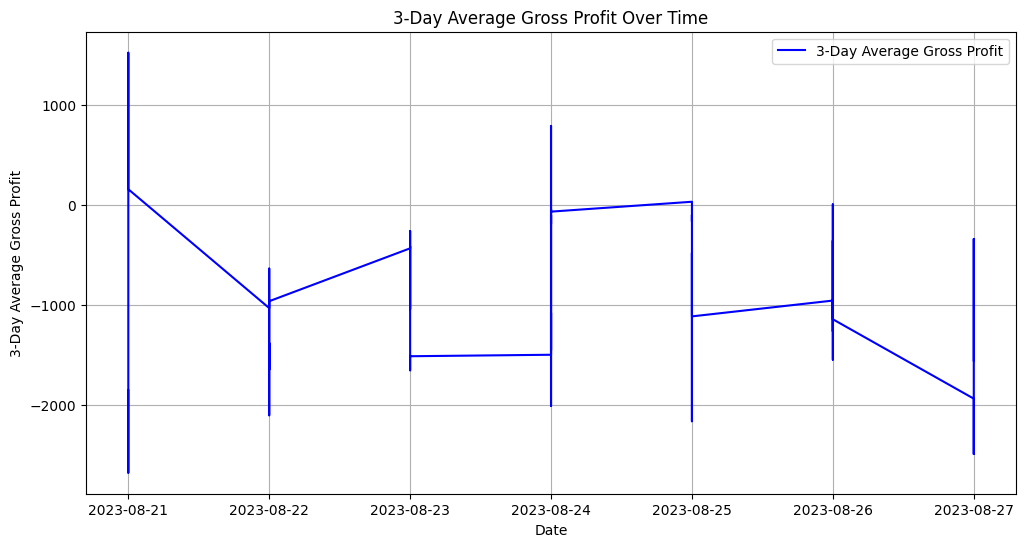

In [89]:
# Plot the 3-day average gross profit over time
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['3-Day Average Gross Profit'], label='3-Day Average Gross Profit', color='blue')
plt.xlabel('Date')
plt.ylabel('3-Day Average Gross Profit')
plt.title('3-Day Average Gross Profit Over Time')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

### 8.optimize the sales process to ensure gross margin is maximized 

In [93]:
# Calculate daily gross profit
data['Daily Gross Profit'] = (data['Selling price'] * data['Quantity sold']) - (data['Buying price'] * data['Quantity bought'])

# Calculate vendor-specific average profit margins
vendor_avg_profit = data.groupby('Firm bought from')['Daily Gross Profit'].mean()

# Calculate customer-specific average profit margins
customer_avg_profit = data.groupby('Customer')['Daily Gross Profit'].mean()

# Identify low-performing vendors with consistently low profit margins
low_performing_vendors = vendor_avg_profit[vendor_avg_profit < 100]

# Segment customers based on profitability
high_value_customers = customer_avg_profit[customer_avg_profit > 100]
low_value_customers = customer_avg_profit[customer_avg_profit < 100]

# Print the results
print("Average Profit Margin by Vendor:")
print(vendor_avg_profit)

print("\nLow-Performing Vendors:")
print(low_performing_vendors)

print("\nHigh-Value Customers:")
print(high_value_customers)

print("\nLow-Value Customers:")
print(low_value_customers)

Average Profit Margin by Vendor:
Firm bought from
Vendor1    -1690.320000
Vendor10    -605.073333
Vendor2     -671.831818
Vendor3     -321.388333
Vendor4     -760.980000
Vendor5    -1434.494286
Vendor6     -221.823333
Vendor7    -1425.609286
Vendor8    -1285.293333
Vendor9     -543.791667
Name: Daily Gross Profit, dtype: float64

Low-Performing Vendors:
Firm bought from
Vendor1    -1690.320000
Vendor10    -605.073333
Vendor2     -671.831818
Vendor3     -321.388333
Vendor4     -760.980000
Vendor5    -1434.494286
Vendor6     -221.823333
Vendor7    -1425.609286
Vendor8    -1285.293333
Vendor9     -543.791667
Name: Daily Gross Profit, dtype: float64

High-Value Customers:
Series([], Name: Daily Gross Profit, dtype: float64)

Low-Value Customers:
Customer
Customer1     -751.755000
Customer10     -41.772000
Customer2     -919.284000
Customer3    -1165.871429
Customer4     -559.246667
Customer5     -801.517143
Customer6     -946.010000
Customer7    -2909.940000
Customer8     -638.352000
Custo

### 9. 25th, 50th (median), and 75th percentiles for both buying and selling prices 

In [94]:
# Calculate the percentiles for buying prices
buying_price_percentiles = data['Buying price'].quantile([0.25, 0.50, 0.75])

# Calculate the percentiles for selling prices
selling_price_percentiles = data['Selling price'].quantile([0.25, 0.50, 0.75])

# Print the results
print("Buying Price Percentiles:")
print("25th Percentile: {:.2f}".format(buying_price_percentiles[0.25]))
print("Median (50th Percentile): {:.2f}".format(buying_price_percentiles[0.50]))
print("75th Percentile: {:.2f}".format(buying_price_percentiles[0.75]))

print("\nSelling Price Percentiles:")
print("25th Percentile: {:.2f}".format(selling_price_percentiles[0.25]))
print("Median (50th Percentile): {:.2f}".format(selling_price_percentiles[0.50]))
print("75th Percentile: {:.2f}".format(selling_price_percentiles[0.75]))

Buying Price Percentiles:
25th Percentile: 29.90
Median (50th Percentile): 60.76
75th Percentile: 78.32

Selling Price Percentiles:
25th Percentile: 38.98
Median (50th Percentile): 78.99
75th Percentile: 103.40


### 10.Sapota’s prices fall below the 25th percentile or above the 75th percentile

In [100]:
# Specify the vendor you want to analyze
vendor_name = "Vendor1"

# Filter the dataset to include only transactions involving the specified vendor
sapota_data = data[data['Firm bought from'] == vendor_name]

# Calculate the 25th and 75th percentiles for buying and selling prices
buying_25th_percentile = sapota_data['Buying price'].quantile(0.25)
buying_75th_percentile = sapota_data['Buying price'].quantile(0.75)
selling_25th_percentile = sapota_data['Selling price'].quantile(0.25)
selling_75th_percentile = sapota_data['Selling price'].quantile(0.75)

# Count how many times prices fall below the 25th percentile or above the 75th percentile
buying_below_25th = len(sapota_data[sapota_data['Buying price'] < buying_25th_percentile])
buying_above_75th = len(sapota_data[sapota_data['Buying price'] > buying_75th_percentile])
selling_below_25th = len(sapota_data[sapota_data['Selling price'] < selling_25th_percentile])
selling_above_75th = len(sapota_data[sapota_data['Selling price'] > selling_75th_percentile])

# Print the results
print(f"Analysis for vendor: {vendor_name}")
print(f"Buying Prices Below 25th Percentile: {buying_below_25th} times")
print(f"Buying Prices Above 75th Percentile: {buying_above_75th} times")
print(f"Selling Prices Below 25th Percentile: {selling_below_25th} times")
print(f"Selling Prices Above 75th Percentile: {selling_above_75th} times")

Analysis for vendor: Vendor1
Buying Prices Below 25th Percentile: 1 times
Buying Prices Above 75th Percentile: 1 times
Selling Prices Below 25th Percentile: 1 times
Selling Prices Above 75th Percentile: 1 times
